<h2>FIN5622 Project #4
    <p class="text-primary">Stock Market Regime Detection with Clustering</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project, we will run a variety of clustering algorithms in an attempt to identify broad stock market regimes. Specifically, we will use the SPX index to represent the stock market, and cluster the movement of various other macroeconimc variables over time consisting of monthly observations from 1962 to 2018. 
    </div>
</div>
<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from previous tasks informing work in later tasks. Include all code used to produce your results, and support your answers with comments if neccessary. <b>Any written text must be typed in a markdown cell to receive credit!</b> You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5622_Project_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    The "SPX_Macroeconomic_Variables.csv" dataset contains time series data on various macroeconomic variables ranging from 7/1/1962 to 10/1/2018 as monthly observations. Read in the "SPX_Macroeconomic_Variables.csv" file using the pandas <code>read_csv()</code> function and store the dataframe in a variable called <code>macro_data</code>. Use the <code>'Date'</code> columns as the index for the dataframe. 
    <br><br>
    Include this additional argument in the <code>read_csv()</code> to tell python to interpret these values as dates, rather than text: 
    <ul>
        <li><code>parse_dates = ['Date']</code></li>
    </ul>
    <br>
    Aside from the SPX index itself, the dataset contains 14 other broad macroeconomic variables that describes the general state of the U.S. economy. In this analysis, we will try to leverage changes in these macroeconomic variables to identify regimes in the stock market. The definitions for each column in the dataset are as follows:
    <ul>
        <li><b>SPX</b>: Price of the S&P 500 index.</li>
        <li><b>Recession</b>: U.S. recessions as inferred by GDP-based recession indicator.</li>
        <li><b>GDP</b>: Annualized percentage change in U.S. GDP.</li>
        <li><b>SPDIV</b>: The dividend yield of the S&P 500.</li>
        <li><b>SPPE</b>: P/E ratio of the S&P 500.</li>
        <li><b>BUSLOANS</b>: Outstanding real commercial and industrial loans.</li>
        <li><b>GS1</b>: 1-year Treasury rates.</li>
        <li><b>GS10</b>: 10-year Treasury rates.</li>
        <li><b>PCEPI</b>: Personal consumption expenditures index.</li>
        <li><b>INDPRO</b>: Industrial production index.</li>
        <li><b>HOUST</b>: Total new privately owned housing units started in thousands.</li>
        <li><b>AAA</b>: AAA-rated corporate bond yields.</li>
        <li><b>NONREVSL</b>: Total real outstanding nonrevolving credit owned and securitized.</li>	
        <li><b>UNRATE</b>: U.S. national unemployment rate.</li>	
        <li><b>UEMPMEAN</b>: Average duration of umeployment in weeks.</li>
    </ul>
    <br>
    Check that the shape of <code>macro_data</code> is <code>(676, 15)</code>.
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

In [2]:
macro_data = pd.read_csv("SPX_Macroeconomic_Variables.csv" , index_col = "Date", parse_dates = ["Date"])
macro_data.shape

(676, 15)

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    Before we can cluster the data, we need to remove any stationarity in our macroeconomic variables by taking the first-order difference. 
        <br>
        <ul>
            <li>With the exception of "<b>SPX</b>" and "<b>Recession</b>", take the first order difference of all other macroeconomic variables in the dataframe <code>macro_data</code>.</li>
           <li>Create a list containing the columns names of <code>macro_data</code>, excluding "<b>SPX</b>". Store this list in a variable called <code>features</code>.</li>
            <li>Drop any rows in <code>macro_data</code> containing NaN's as a result of the differencing (which should only be the first row).</li>
        </ul>
    <br>
    Recall that you can quickly take differences by using the <code>.diff()</code> method for a dataframe. Check that the shape of <code>SPX</code> is now <code>(675, 15)</code>. Your final <code>macro_data</code> dataframe should look like this:

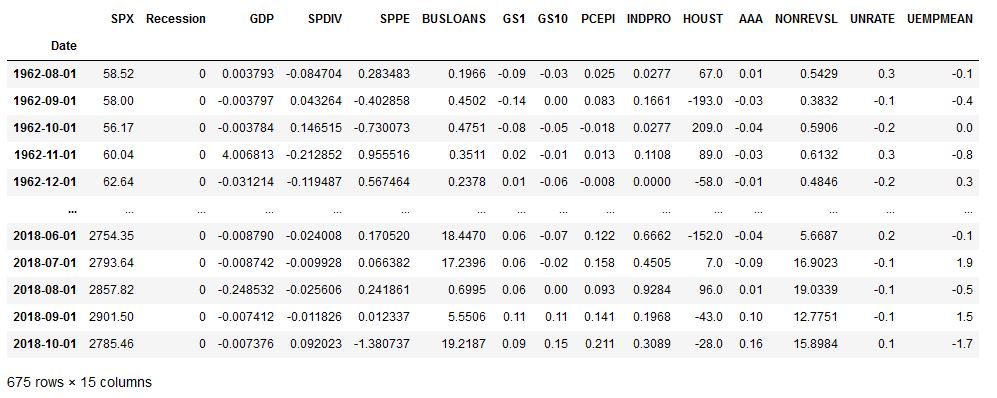
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [3]:
features = macro_data.columns.tolist()
features.remove("SPX")
features.remove("Recession")
features = ["Recession"]+ features

In [4]:
macro_data.loc[:, features] = macro_data[features].diff(1)
macro_data = macro_data.dropna()

In [5]:
macro_data

,SPX,Recession,GDP,SPDIV,SPPE,BUSLOANS,GS1,GS10,PCEPI,INDPRO,HOUST,AAA,NONREVSL,UNRATE,UEMPMEAN
Date,,,,,,,,,,,,,,,
1962-08-01,58.52,0.0,0.003793,-0.084704,0.283483,0.1966,-0.09,-0.03,0.025,0.0277,67.0,0.01,0.5429,0.3,-0.1
1962-09-01,58.00,0.0,-0.003797,0.043264,-0.402858,0.4502,-0.14,0.00,0.083,0.1661,-193.0,-0.03,0.3832,-0.1,-0.4
1962-10-01,56.17,0.0,-0.003784,0.146515,-0.730073,0.4751,-0.08,-0.05,-0.018,0.0277,209.0,-0.04,0.5906,-0.2,0.0
1962-11-01,60.04,0.0,4.006813,-0.212852,0.955516,0.3511,0.02,-0.01,0.013,0.1108,89.0,-0.03,0.6132,0.3,-0.8
1962-12-01,62.64,0.0,-0.031214,-0.119487,0.567464,0.2378,0.01,-0.06,-0.008,0.0000,-58.0,-0.01,0.4846,-0.2,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-01,2754.35,0.0,-0.008790,-0.024008,0.170520,18.4470,0.06,-0.07,0.122,0.6662,-152.0,-0.04,5.6687,0.2,-0.1
2018-07-01,2793.64,0.0,-0.008742,-0.009928,0.066382,17.2396,0.06,-0.02,0.158,0.4505,7.0,-0.09,16.9023,-0.1,1.9
2018-08-01,2857.82,0.0,-0.248532,-0.025606,0.241861,0.6995,0.06,0.00,0.093,0.9284,96.0,0.01,19.0339,-0.1,-0.5


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    While there is no "correct" choice for the number of clusters, there are several different methods or heuristics we can use to help us select an appropriate number of clusters. One such method is by examining the "Elbow plot".
    <br>
    <ul>
        <li>Fit the k-means algorithm on the <code>SPY</code> dataframe using different numbers of cluster ranging from 1 to 10 (use a <code>for</code> loop here!). Remember to set <code>random_state = 5622</code> and <code>init = 'k-means++'</code>.</li>  
        <li>At each iteration, store the weighted sum of squares (WSS) metric from the resulting k-means cluster model in a list. The WSS metric for the model is saved in the model object's <code>.inertia_</code> attribute.</li>
        <li>Lastly, plot a line plot of the list of WSS, with WSS on the y-axis and number of clusters on the x-axis labeled.</li>
    </ul>
    <br>
    Recall that the <code>.fit()</code> method is used to fit the k-means clustering model on a training dataset. And remember to only train using the features identified in the <code>features</code> list! <b>Closing price of SPX should not be used as a feature!</b>
    <br><br>
    Your plot should look like this:
        
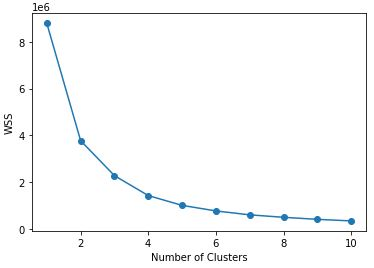
    <br>
    For our analysis, we will select 3 clusters. <b>However, briefly explain why it is likely not a good choice to use 10 clusters for this analysis.</b>
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [6]:
distance = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters = i, init = "k-means++", random_state = 5622).fit(macro_data[features])
    distance.append(kmeans_model.inertia_)

C:\Users\laksh\anaconda3.1\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


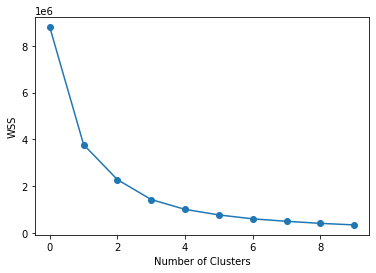

In [7]:
plt.plot(distance, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.show()

The reason why it is not a good choice to use 10 clusters for this analysis is that too many clusters will lead to diminishing returns. 

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    With the number of clusters determined, refit the kmeans model assuming 3 clusters, and use it to cluster the daily observations in the <code>SPX</code> dataframe. Remember to set <code>random_state = 5622</code> and <code>init = 'k-means++'</code>. Store the cluster assignments in variable called <code>kmeans_clusters</code>. 
    <br><br>
    Recall that the <code>.predict()</code> method is used to assign clusters using the fitted model.
    <br><br>
    Using the values in the <code>kmeans_clusters</code> calculate the average of all fields within each of the 3 clusters (this can be done very easily using the dataframe's <code>.groupby()</code> method).
    <br><br>
    Your final output should look somthing like this:

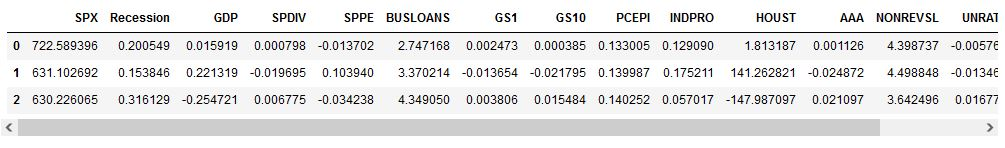
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [8]:
kmeans_model = KMeans(n_clusters = 3, init = "k-means++", random_state = 5622).fit(
    macro_data[features])

In [9]:
kmeans_clusters = kmeans_model.fit_predict(macro_data[features])

In [10]:
macro_data.groupby(kmeans_clusters).mean()

,SPX,Recession,GDP,SPDIV,SPPE,BUSLOANS,GS1,GS10,PCEPI,INDPRO,HOUST,AAA,NONREVSL,UNRATE,UEMPMEAN
0,722.589396,-0.002747,0.015919,0.000798,-0.013702,2.747168,0.002473,0.000385,0.133005,0.129090,1.813187,0.001126,4.398737,-0.005769,0.045879
1,631.102692,-0.012821,0.221319,-0.019695,0.103940,3.370214,-0.013654,-0.021795,0.139987,0.175211,141.262821,-0.024872,4.498848,-0.013462,0.012821
2,630.226065,0.019355,-0.254721,0.006775,-0.034238,4.349050,0.003806,0.015484,0.140252,0.057017,-147.987097,0.021097,3.642496,0.016774,-0.070323


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    Use the code below to visually plot the kmeans market regimes where each cluster / regime is color coded:
    <br>
    <code>
plt.figure(figsize = (15, 7))
plt.plot(macro_data['SPX'], color = 'black')
for i in range(3):
    plt.scatter(macro_data.index[kmeans_clusters == i], macro_data['SPX'][kmeans_clusters == i], label = f'cluster {i}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('SPX Price')
plt.show()</code>
    <br><br>
    Your plot should look something like this (although the colors may be swapped):

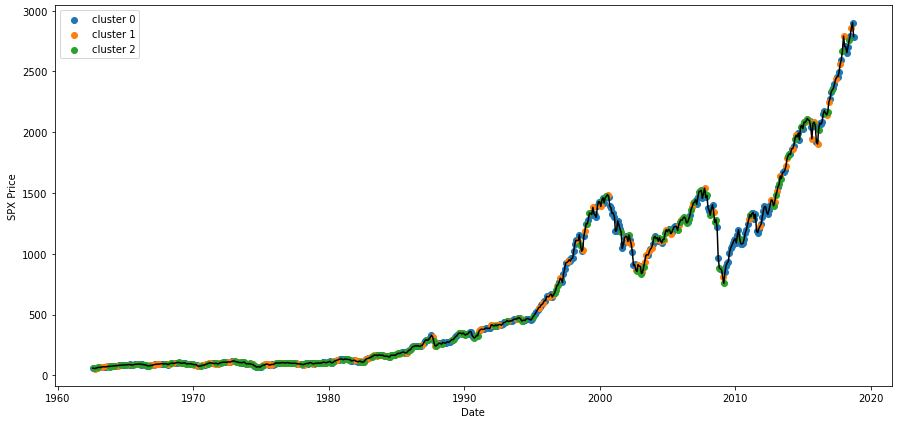
    <br>
    Based on visually assessing this plot and quantitatively assessing the averages calculated in the previous task, briefly describe the characteristics of each market regime according to the k-means model. Do you believe the k-means clustering algorithm performed well in identifying 3 different market regimes?
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

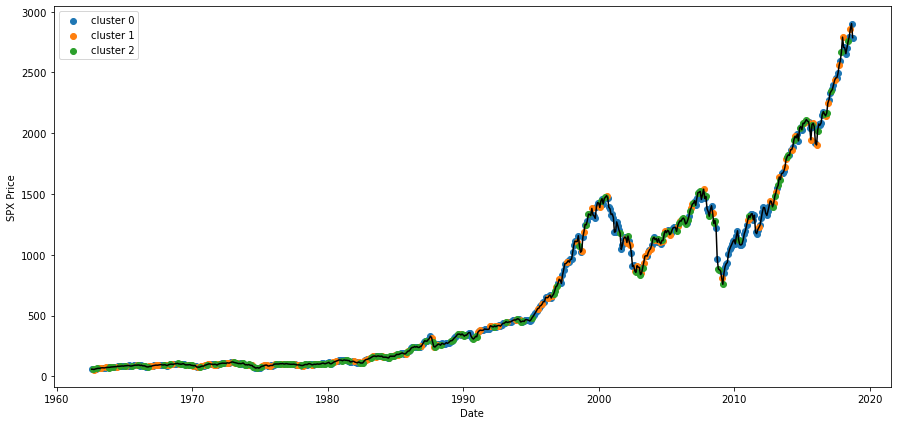

In [11]:
plt.figure(figsize = (15, 7))
plt.plot(macro_data['SPX'], color = 'black')
for i in range(3):
    plt.scatter(macro_data.index[kmeans_clusters == i], macro_data['SPX'][kmeans_clusters == i], label = f'cluster {i}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('SPX Price')
plt.show()

The model did a good job predicting the rises declines in the price, but proved to be ineffecive in predicting the prices of the early flat rates



<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 6</b>
    </div>
    <div class = "panel-body"> 
    Repeat tasks 5 - 6, this time using the Gaussian Mixture Model (GMM), keeping consistent the assumption that there are 3 clusters. Use the following parameters when fitting the model:
    <br>
    <ul>
        <li><code>n_components = 3</code></li>
        <li><code>covariance_type = "full"</code></li>
        <li><code>n_init = 100</code></li>
        <li><code>random_state = 5622</code></li>
    </ul>
    <br>
    Store the cluster assignments in variable called <code>gmm_clusters</code>. 
    <br><br>
    Your plot and final output should look something like this (although the colors may be swapped): 
        
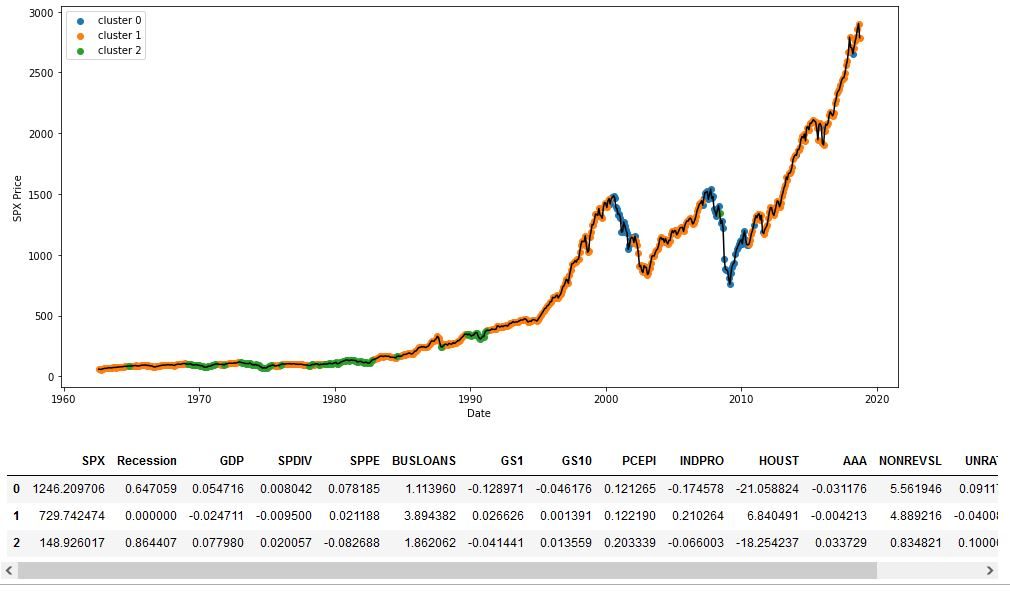
    <br>
    Compare and contrast the clusters created under the k-means clustering algorithm vs. GMM. Which algorithm do you feel performed better in identifying 3 different market regimes, and why?
    <p style="text-align:right;">[25pts]</p>
    </div>
</div>

In [12]:
gmm_model = GaussianMixture(n_components = 3, covariance_type = "full", n_init = 100, random_state = 5622)
gmm_model = gmm_model.fit(macro_data[features])
gmm_clusters = gmm_model.predict(macro_data[features])

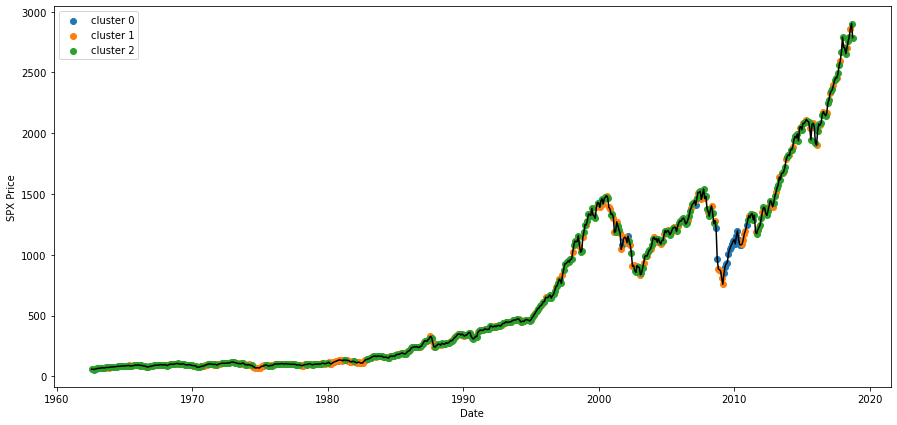

In [13]:
plt.figure(figsize = (15, 7))
plt.plot(macro_data['SPX'], color = 'black')
for i in range(3):
    plt.scatter(macro_data.index[gmm_clusters == i], macro_data['SPX'][gmm_clusters == i], label = f'cluster {i}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('SPX Price')
plt.show()

In [14]:
macro_data.groupby(gmm_clusters).mean()

,SPX,Recession,GDP,SPDIV,SPPE,BUSLOANS,GS1,GS10,PCEPI,INDPRO,HOUST,AAA,NONREVSL,UNRATE,UEMPMEAN
0,869.437778,0.0,0.090296,-0.037055,0.264085,-6.103375,-0.02250,0.032222,0.161917,0.056642,-0.777778,0.009444,3.656644,0.038889,0.547222
1,605.777041,0.0,0.047287,0.007935,-0.038212,2.962274,-0.01618,-0.002022,0.135693,0.080759,5.670412,-0.006142,3.873767,0.023970,-0.005243
2,715.369274,0.0,-0.040424,-0.006764,0.017785,4.378010,0.01207,-0.003978,0.134226,0.160101,-4.642473,0.002957,4.574227,-0.025269,-0.028226


The two models are very similar, and perform better than each other in the opposite categories.  This model does a much better job at predicting the prices of the early flat rates, howeever it does a poor job of predicting increase/decrease in price.  The "better" model so to say would be the one that is most relavant to the needs of whoever is utilizing them.




<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Extra Credit</b>
    </div>
    <div class = "panel-body"> 
    Repeat tasks 5 and 6 under hierarchical clustering, also using 3 clusters. 
    <br><br>
    Recall that we can build a hierarchical clustering model by calling <code>AgglomerativeClustering()</code> from the <code>sklearn.cluster</code> module, and using the <code>fit()</code> method. Additionally, set the following optional parameters for <code>AgglomerativeClustering()</code> to the values listed below:
    <ul>
        <li><code>affinity = 'euclidean'</code></li>
        <li><code>linkage = 'average'</code></li>. 
    </ul>
    Does the hierarchical clustering algorithm outperform k-means and GMM in identifying 3 different market regimes? If it did not, what about this dataset do you think is the reason? 
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [15]:
agglo_model = AgglomerativeClustering(affinity = 'euclidean', linkage = 'average')
agglo_model = agglo_model.fit(macro_data[features])
agglo_clusters = agglo_model.fit_predict(macro_data[features])
macro_data.groupby(agglo_clusters).mean()

,SPX,Recession,GDP,SPDIV,SPPE,BUSLOANS,GS1,GS10,PCEPI,INDPRO,HOUST,AAA,NONREVSL,UNRATE,UEMPMEAN
0,682.756310,0.0,0.001520,-0.002747,0.009328,3.254950,-0.002411,-0.00253,0.135958,0.124891,1.776786,-0.001488,4.253956,-0.002232,0.011756
1,115.786667,0.0,-0.061073,0.038026,-0.116104,4.166267,0.326667,0.28000,0.209000,-0.255767,-478.333333,0.266667,2.963033,-0.033333,-0.033333


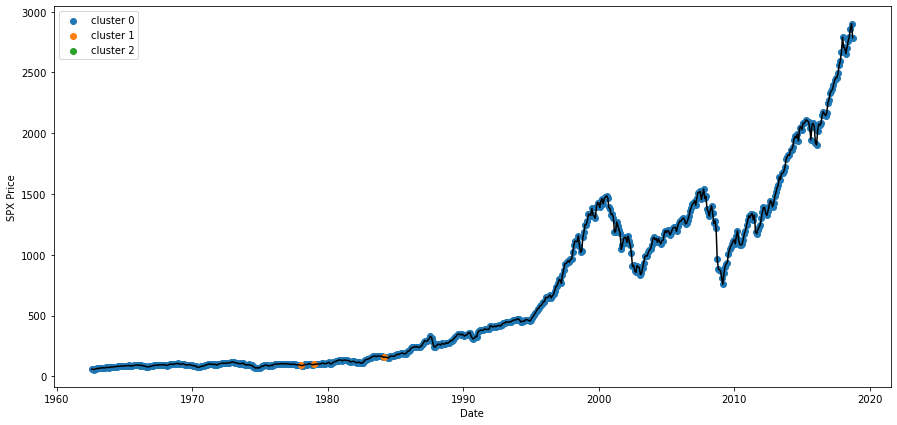

In [16]:
plt.figure(figsize = (15, 7))
plt.plot(macro_data['SPX'], color = 'black')
for i in range(3):
    plt.scatter(macro_data.index[agglo_clusters == i], macro_data['SPX'][agglo_clusters == i], label = f'cluster {i}')
plt.legend()
plt.xlabel('Date')
plt.ylabel('SPX Price')
plt.show()

This method does not outperform the GMM or K-means method.  I believe that this is due to the fact that this model has less means and less data to create a model out of, inherently making it more innacurate due to lack of data. 